In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv(r"C:\Users\ALKA\OneDrive\Desktop\Data Analytics project\Softnix internship\Extractdir\titanic.csv")

In [8]:
df.shape
df.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [9]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [10]:
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [11]:
df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887,887,887.000000,887.000000,887.000000,887.00000
unique,NaN,NaN,887,2,NaN,NaN,NaN,NaN
top,NaN,NaN,Mr. Owen Harris Braund,male,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,573,NaN,NaN,NaN,NaN
mean,0.385569,2.305524,NaN,NaN,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,NaN,NaN,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,NaN,NaN,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,31.13750


In [12]:
print("\nNo missing values detected in this dataset.")


No missing values detected in this dataset.


In [13]:
df['Age'].fillna(df['Age'].median(), inplace=True)


C:\Users\ALKA\AppData\Local\Temp\ipykernel_27368\286566303.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [14]:
###########  Distribution Analysis   ####################

C:\Users\ALKA\AppData\Local\Temp\ipykernel_27368\3355599056.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Fare', data=df, ax=ax[1], palette="Set2")


Text(0.5, 1.0, 'Fare by Passenger Class')

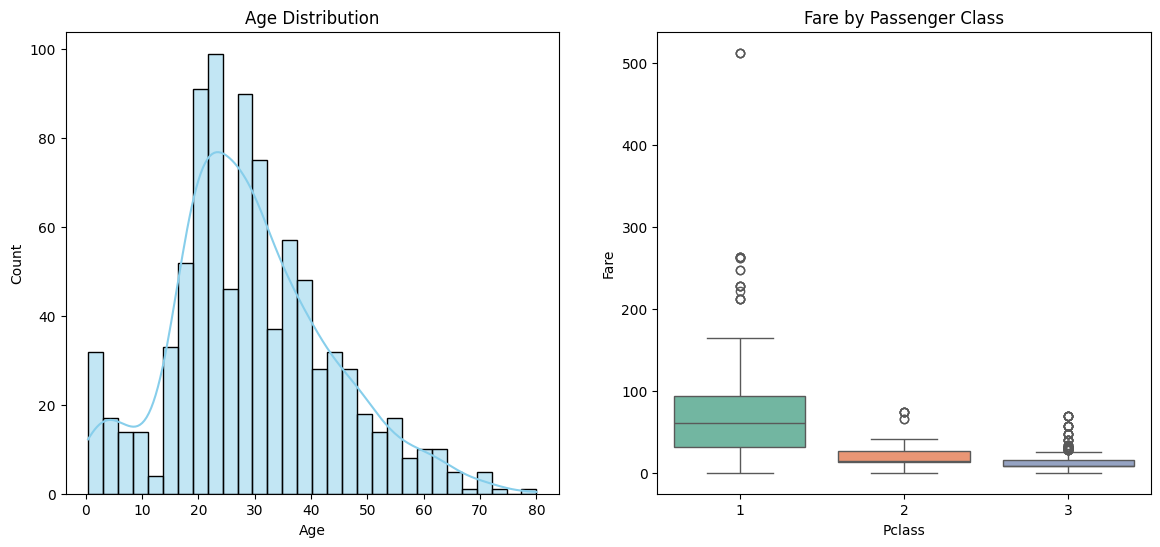

In [15]:
# Numerical Features: Age distribution & Fare by Class
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Age Distribution Histogram + KDE
sns.histplot(df['Age'], bins=30, kde=True, ax=ax[0], color="skyblue")
ax[0].set_title("Age Distribution")

# Boxplot of Fare by Passenger Class
sns.boxplot(x='Pclass', y='Fare', data=df, ax=ax[1], palette="Set2")
ax[1].set_title("Fare by Passenger Class")

In [16]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

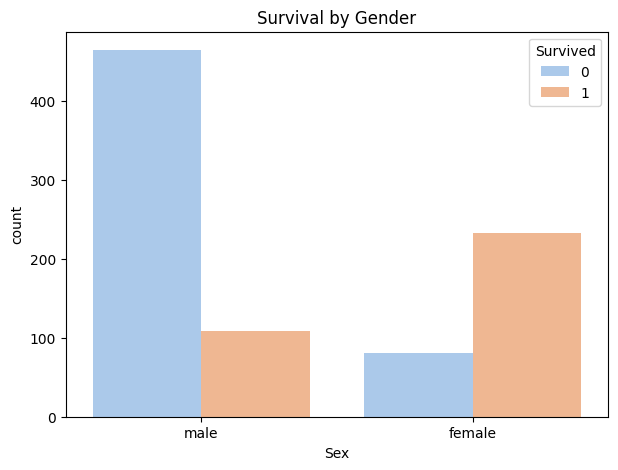

In [17]:
# Categorical Feature: Countplot of Survival by Gender
plt.figure(figsize=(7, 5))
sns.countplot(x='Sex', hue='Survived', data=df, palette="pastel")
plt.title("Survival by Gender")
plt.show()

In [18]:
################    Correlation & Relationships    ##################

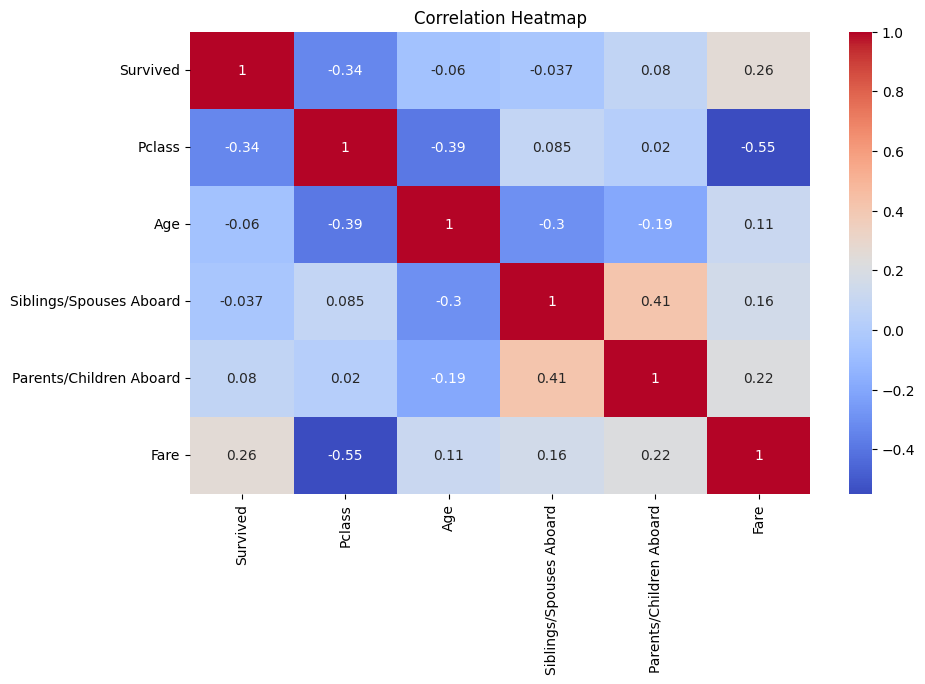

In [19]:
# Correlation Matrix Heatmap (numeric features only)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [20]:
# Cross-tabulation: Survival rates by Passenger Class
survival_by_class = pd.crosstab(df['Pclass'], df['Survived'], normalize='index') * 100
survival_by_class = survival_by_class.round(2)
survival_by_class

Survived,0,1
Pclass,,
1,37.04,62.96
2,52.72,47.28
3,75.56,24.44


In [2]:
from scipy import stats

In [ ]:
#############  Outlier Detection   ########################

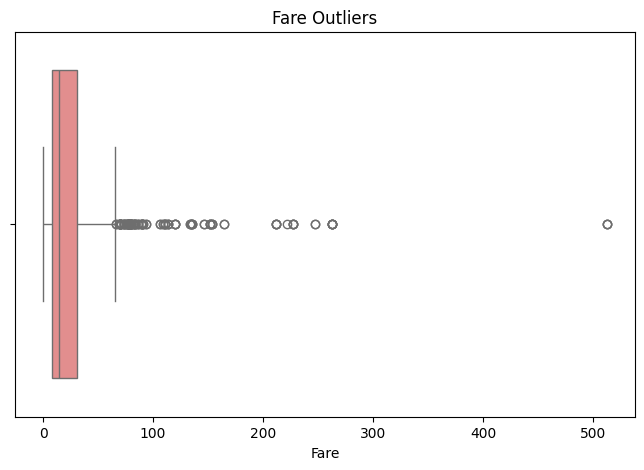

In [22]:
# Boxplot for Fare Outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Fare'], color="lightcoral")
plt.title("Fare Outliers")
plt.show()

In [ ]:
# Z-score Analysis for Fare
z_scores = np.abs(stats.zscore(df['Fare']))
outliers = df[z_scores > 3]     # values more than 3 std deviations away
print(f"Found {len(outliers)} fare outliers")
print(outliers[['Pclass','Fare']].head())

Found 20 fare outliers
     Pclass      Fare
27        1  263.0000
87        1  263.0000
117       1  247.5208
257       1  512.3292
297       1  247.5208


In [24]:
num_outliers = len(outliers)
max_fare = df['Fare'].max()

In [25]:

num_outliers, max_fare, outliers.head()

(20,
 np.float64(512.3292),
      Survived  Pclass                                            Name     Sex  \
 27          0       1                   Mr. Charles Alexander Fortune    male   
 87          1       1                       Miss. Mabel Helen Fortune  female   
 117         0       1                         Mr. Quigg Edmond Baxter    male   
 257         1       1                                 Miss. Anna Ward  female   
 297         1       1  Mrs. James (Helene DeLaudeniere Chaput) Baxter  female   
 
       Age  Siblings/Spouses Aboard  Parents/Children Aboard      Fare  
 27   19.0                        3                        2  263.0000  
 87   23.0                        3                        2  263.0000  
 117  24.0                        0                        1  247.5208  
 257  35.0                        0                        0  512.3292  
 297  50.0                        0                        1  247.5208  )

In [ ]:
########################  Advanced Visualizations  ######################

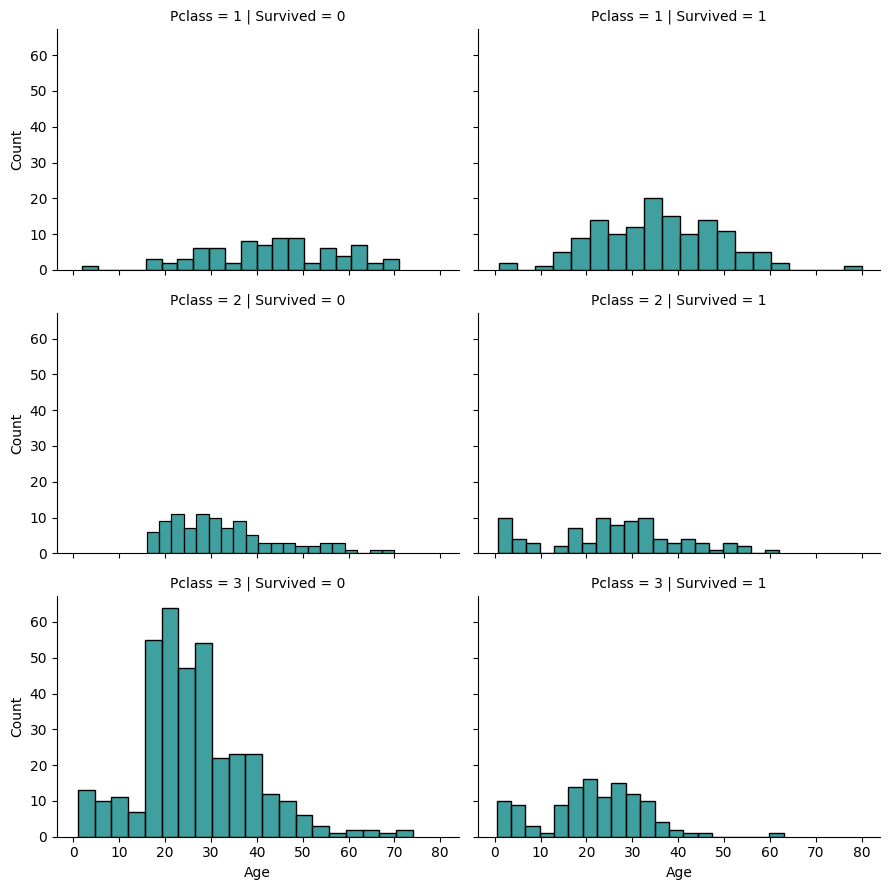

In [27]:
g = sns.FacetGrid(df, col='Survived', row='Pclass', height=3, aspect=1.5)
g.map(sns.histplot, 'Age', bins=20, color="teal")
plt.show()


In [ ]:
#################     Pairplot (Multivariate Analysis)       ###################

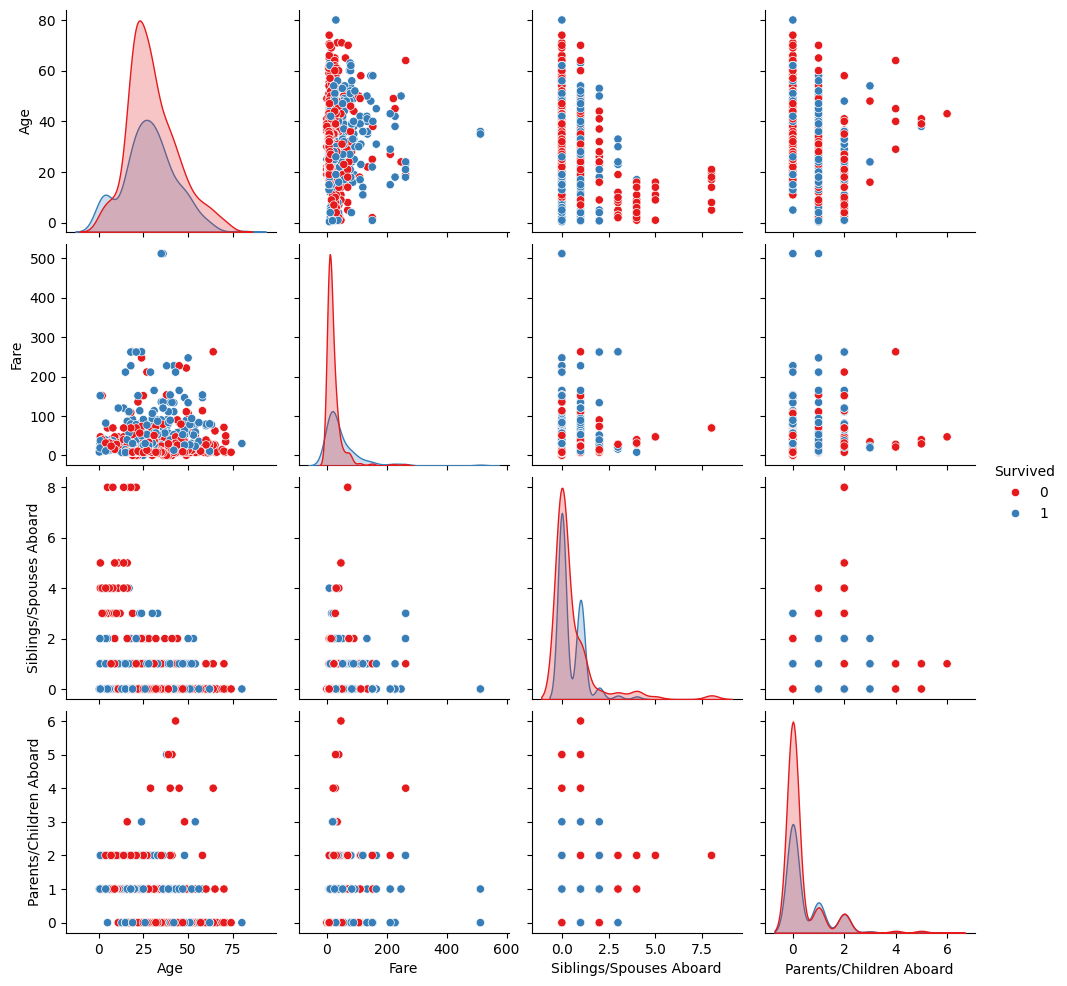

In [28]:
sns.pairplot(df[['Age','Fare','Siblings/Spouses Aboard','Parents/Children Aboard','Survived']], 
             hue='Survived', palette="Set1")
plt.show()


In [3]:
df1 = pd.read_csv(r"C:\Users\ALKA\OneDrive\Desktop\Data Analytics project\Softnix internship\Extractdir\all_stocks_5yr.csv")

In [14]:
df1.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [12]:
df1.shape

(619040, 7)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [17]:
df1.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [15]:
df1.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [18]:
df1.describe(include='all')

,date,open,high,low,close,volume,Name
count,619040,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05,619040
unique,1259,NaN,NaN,NaN,NaN,NaN,505
top,2018-01-09,NaN,NaN,NaN,NaN,NaN,ZTS
freq,505,NaN,NaN,NaN,NaN,NaN,1259
mean,NaN,83.023334,83.778311,82.256096,83.043763,4.321823e+06,NaN
std,NaN,97.378769,98.207519,96.507421,97.389748,8.693610e+06,NaN
min,NaN,1.620000,1.690000,1.500000,1.590000,0.000000e+00,NaN
25%,NaN,40.220000,40.620000,39.830000,40.245000,1.070320e+06,NaN
50%,NaN,62.590000,63.150000,62.020000,62.620000,2.082094e+06,NaN
75%,NaN,94.370000,95.180000,93.540000,94.410000,4.284509e+06,NaN


In [19]:
df1.duplicated().sum()

np.int64(0)

In [20]:
df1.drop_duplicates()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [24]:
df1["date"] = pd.to_datetime(df1["date"], errors="coerce")

In [25]:
df1["Name"] = df1["Name"].astype("category")

In [27]:
df1.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name            category
dtype: object

In [ ]:
###########  Plot histograms / boxplots for numerical features   ###########################

In [31]:
num_cols = ["open", "high", "low", "close", "volume"]

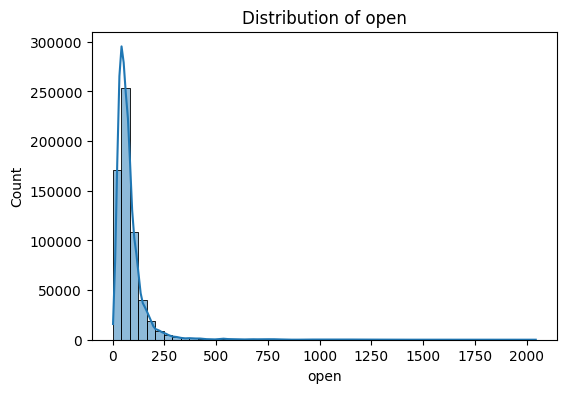

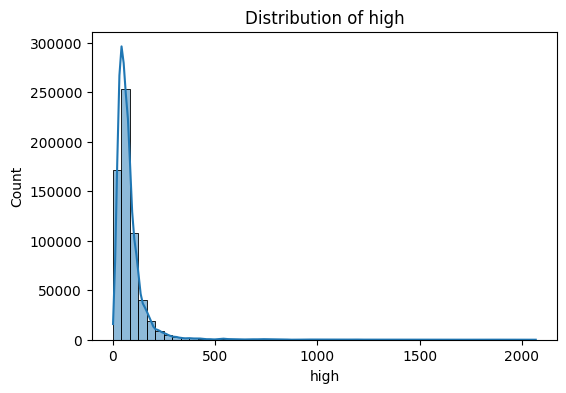

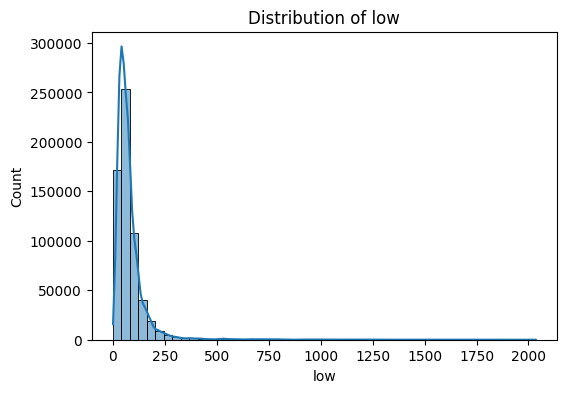

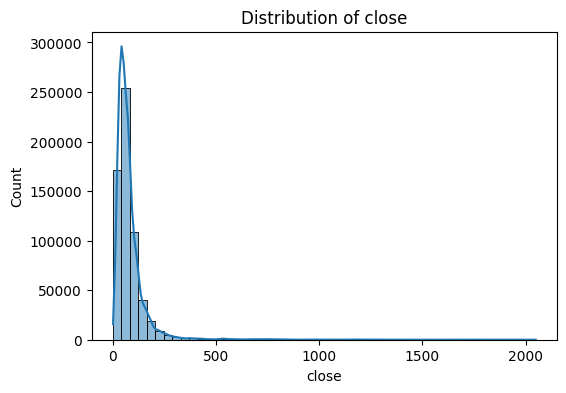

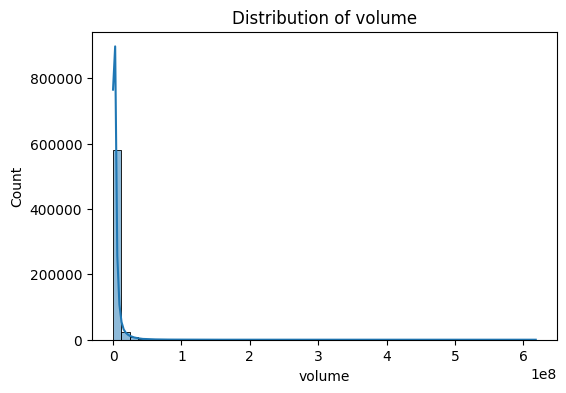

In [32]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df1[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

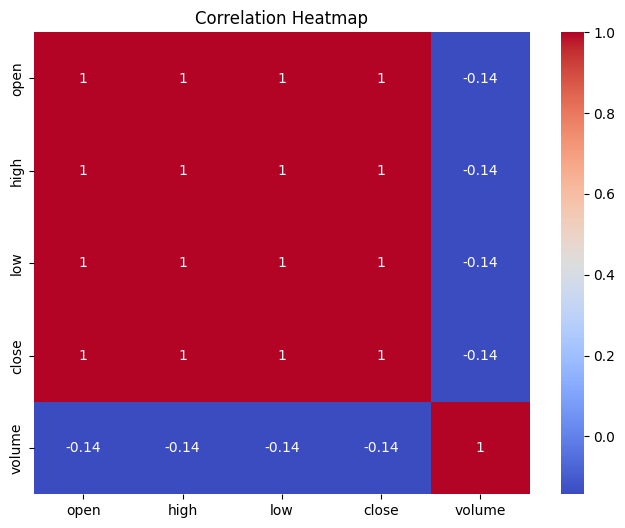

In [ ]:
###### Correlation heatmap (numerical features) #######

plt.figure(figsize=(8,6))
sns.heatmap(df1[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
##########  Line plot of stock prices over time (pick one stock)  #################

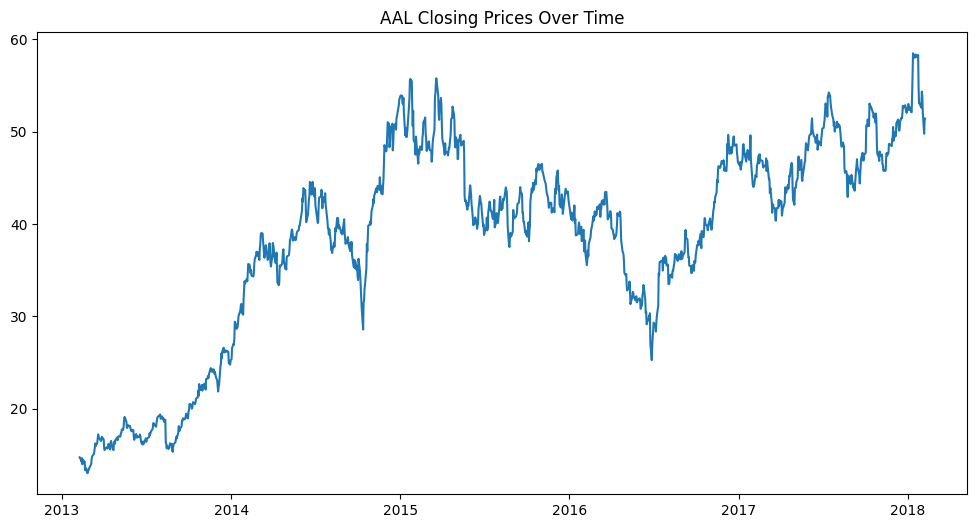

In [34]:
aal = df1[df1["Name"] == "AAL"]
plt.figure(figsize=(12,6))
plt.plot(aal["date"], aal["close"])
plt.title("AAL Closing Prices Over Time")
plt.show()

In [ ]:
##########   Boxplots for numeric columns   #############

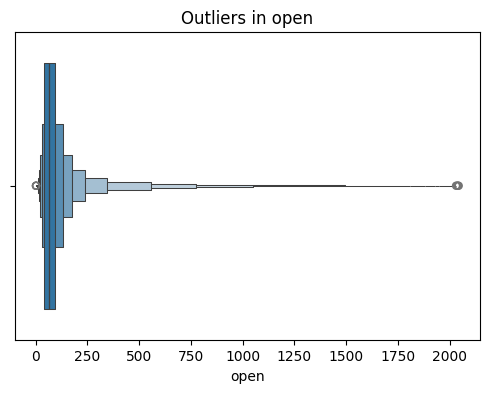

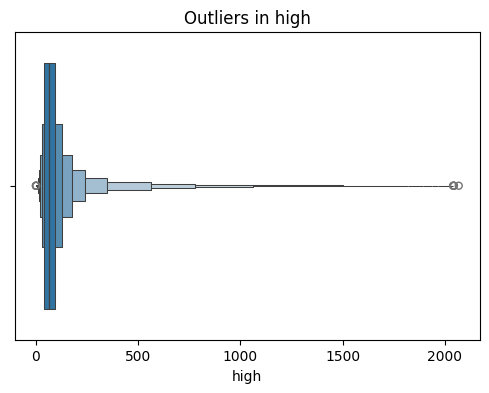

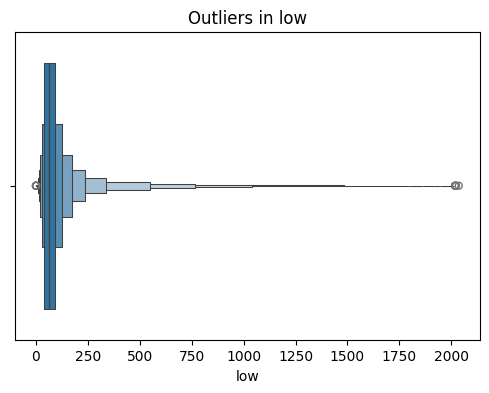

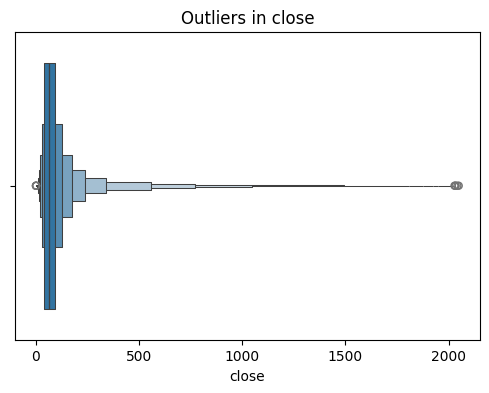

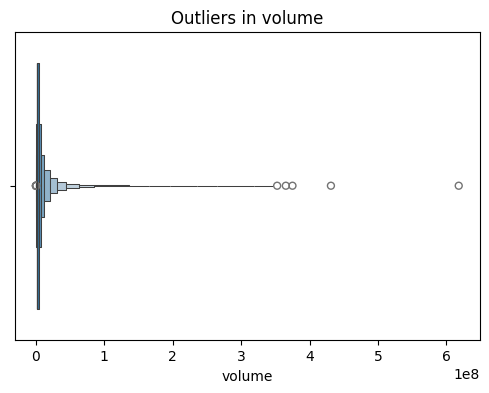

In [35]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxenplot(x=df1[col])
    plt.title(f"Outliers in {col}")
    plt.show()

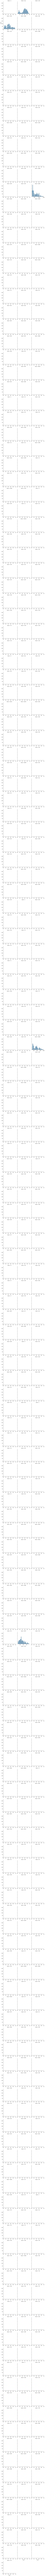

In [37]:
######  Closing price distribution across a few companies   #########

# Take only a subset of companies (otherwise too many to plot)
sample_stocks = ["AAL", "AAPL", "GOOG", "MSFT", "AMZN"]
df_subset = df1[df1["Name"].isin(sample_stocks)]

# Facet Grid: Closing Price distribution per Stock
g = sns.FacetGrid(df_subset, col="Name", col_wrap=3, height=3, sharex=False)
g.map(sns.histplot, "close", bins=30, kde=True)
plt.show()

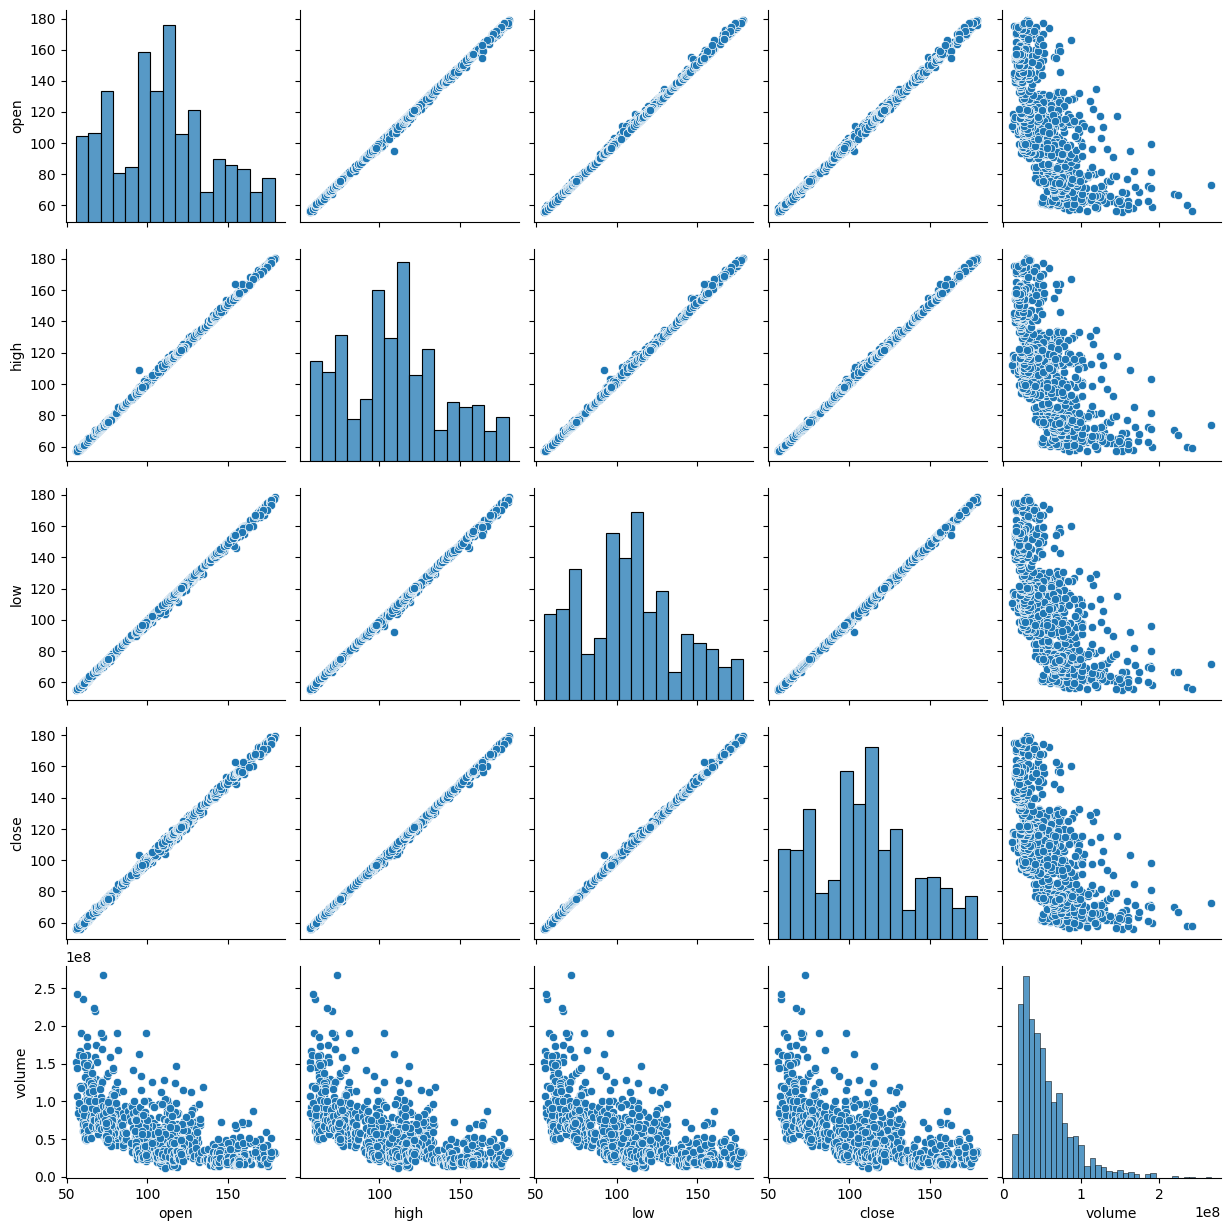

In [38]:
###### Pairplot (Multivariate Analysis)   ####################
# Filter Apple stock
aapl = df1[df1["Name"] == "AAPL"]

# Pairplot of numerical features
sns.pairplot(aapl[["open", "high", "low", "close", "volume"]])
plt.show()


In [3]:
df2 = pd.read_csv(r"C:\Users\ALKA\OneDrive\Desktop\Data Analytics project\Softnix internship\Extractdir\UID_ISO_FIPS_LookUp_Table.csv")

In [5]:
df2.shape

(4321, 12)

In [6]:
df2.dtypes

UID                 int64
iso2               object
iso3               object
code3             float64
FIPS              float64
Admin2             object
Province_State     object
Country_Region     object
Lat               float64
Long_             float64
Combined_Key       object
Population        float64
dtype: object

In [7]:
df2.isnull().sum()

UID                 0
iso2                5
iso3                4
code3               4
FIPS              937
Admin2            978
Province_State    202
Country_Region      0
Lat               148
Long_             148
Combined_Key        0
Population        151
dtype: int64

In [8]:
df2.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.93911,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.15330,20.168300,Albania,2877800.0
2,10,AQ,ATA,10.0,NaN,NaN,NaN,Antarctica,-71.94990,23.347000,Antarctica,NaN
3,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.03390,1.659600,Algeria,43851043.0
4,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.50630,1.521800,Andorra,77265.0


In [11]:
df2.duplicated().sum()

np.int64(0)

In [12]:
df2.drop_duplicates()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.939110,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.153300,20.168300,Albania,2877800.0
2,10,AQ,ATA,10.0,NaN,NaN,NaN,Antarctica,-71.949900,23.347000,Antarctica,NaN
3,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.033900,1.659600,Algeria,43851043.0
4,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.506300,1.521800,Andorra,77265.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4316,84056037,US,USA,840.0,56037.0,Sweetwater,Wyoming,US,41.659439,-108.882788,"Sweetwater, Wyoming, US",42343.0
4317,84056039,US,USA,840.0,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",23464.0
4318,84056041,US,USA,840.0,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",20226.0
4319,84056043,US,USA,840.0,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",7805.0


In [ ]:
#### Basic Exploration - Unique values
df2.nunique()

UID               4321
iso2               236
iso3               237
code3              236
FIPS              3384
Admin2            1986
Province_State     746
Country_Region     202
Lat               4164
Long_             4154
Combined_Key      4321
Population        4111
dtype: int64

In [ ]:
#######   Handle Missing Values (for EDA only)   ########

In [14]:
df_eda = df2.copy()

In [15]:
df_eda["Population"] = df_eda["Population"].fillna(df_eda['Population'].median())
df_eda = df_eda.drop(columns=['FIPS','Admin2']) ## High missing, not crucial

In [16]:
df_eda.head()

,UID,iso2,iso3,code3,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,Afghanistan,33.93911,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,Albania,41.15330,20.168300,Albania,2877800.0
2,10,AQ,ATA,10.0,NaN,Antarctica,-71.94990,23.347000,Antarctica,41116.5
3,12,DZ,DZA,12.0,NaN,Algeria,28.03390,1.659600,Algeria,43851043.0
4,20,AD,AND,20.0,NaN,Andorra,42.50630,1.521800,Andorra,77265.0


In [ ]:
##########  Distribution Analysis     ######

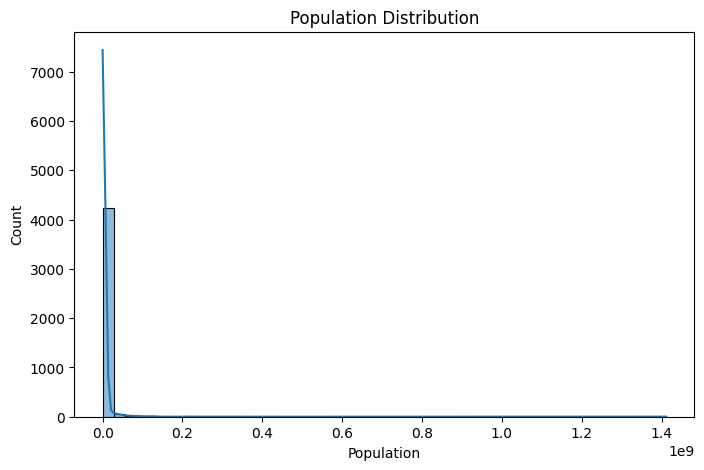

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df_eda['Population'], bins=50, kde=True)
plt.title("Population Distribution")
plt.show()

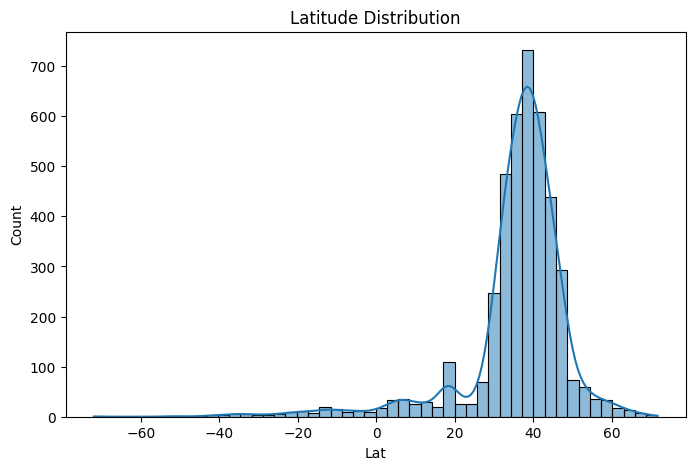

In [ ]:
# Latitude Distribustion
plt.figure(figsize=(8,5))
sns.histplot(df_eda['Lat'], bins=50, kde=True)
plt.title("Latitude Distribution")
plt.show()

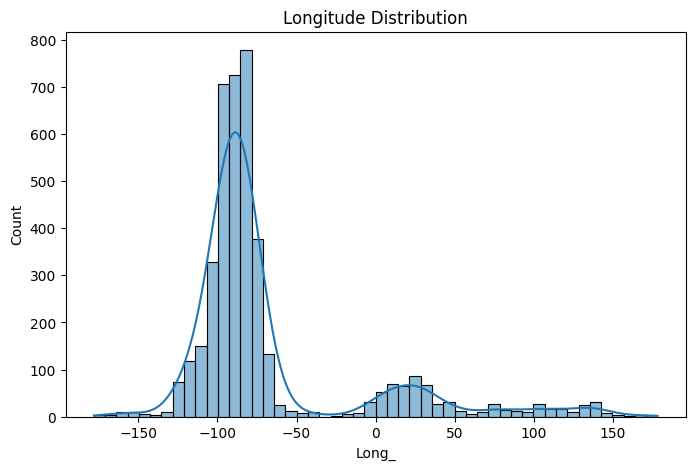

In [19]:
# Longitude distribution
plt.figure(figsize=(8,5))
sns.histplot(df_eda['Long_'], bins=50, kde=True)
plt.title("Longitude Distribution")
plt.show()

In [ ]:
######## Relationships - Correlation heatmap #######

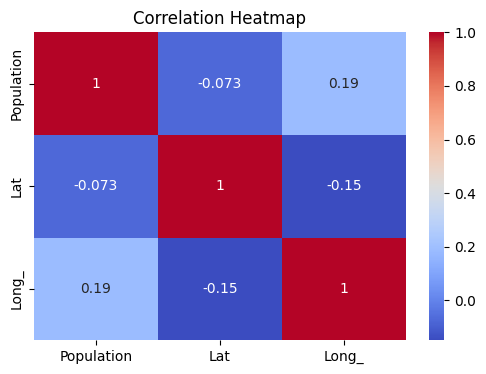

In [20]:
plt.figure(figsize=(6,4))
sns.heatmap(df_eda[['Population', 'Lat', 'Long_']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [21]:
################ Group by Country - Population #####################
country_population = df_eda.groupby("Country_Region")['Population'].sum().sort_values(ascending=False).head(10)


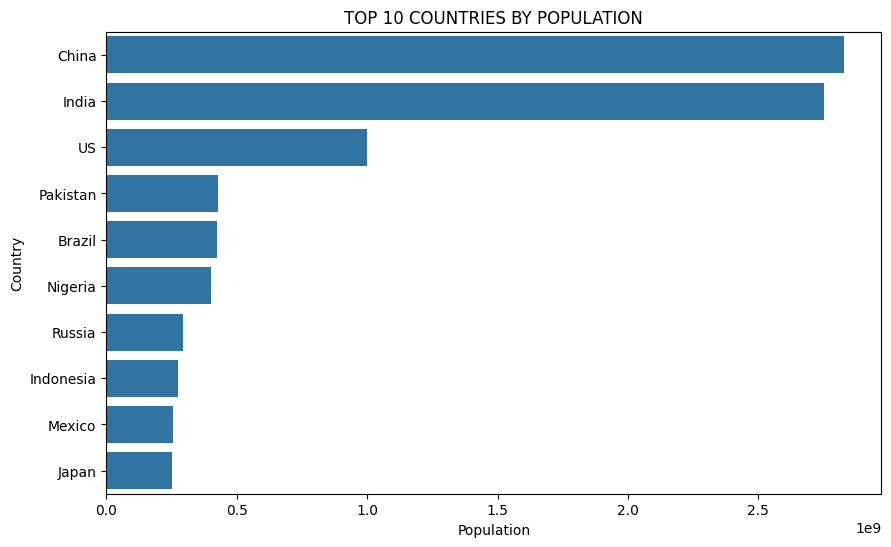

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x=country_population.values, y= country_population.index)
plt.title("TOP 10 COUNTRIES BY POPULATION")
plt.xlabel("Population")
plt.ylabel("Country")
plt.show()

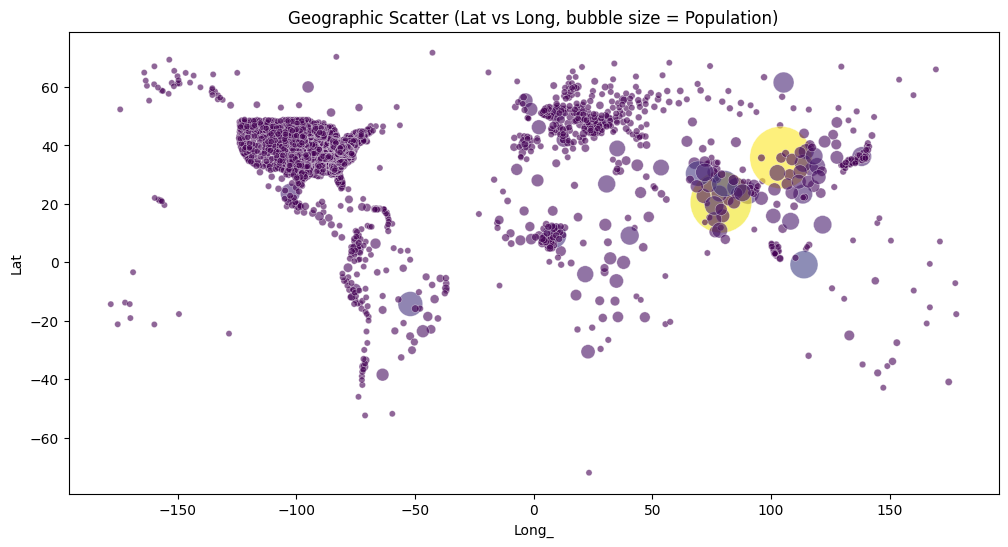

In [23]:
####### Advanced Visualization - Geographic scatter  #########
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_eda, x="Long_", y="Lat", size="Population", hue="Population",
                sizes=(20, 2000), alpha=0.6, palette="viridis", legend=False)
plt.title("Geographic Scatter (Lat vs Long, bubble size = Population)")
plt.show()

